# Lab 6 - Gaussian Process

### Task 1: simulating from Gaussian Process model

To make any simulations, first you need a set of observations:

In [2]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import statistics as s 

import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#Observed data
x_obs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
y_obs = [0.328572824089476, 4.20607004111644, 1.35507551134795,
0.161608755204364, -5.42320349780782, -3.05851276224202, -0.0764172642034502,
-4.55218472276499, -0.902226297922731, -5.8609833528976, -1.05854090910473]

Model also needs sampling space and the indexes of where our observed data resides there. 
For your convenience, we provide them below:

In [4]:
x_predict = np.linspace(-11,11,551,endpoint=True)
observed_idx = [26, 76, 126, 176, 226, 276, 326, 376, 426, 476, 526]

In this example we are using kernel from exponentiated quadratic family, so we need to provide its hyperparameters (alpha and rho). Moreover, for sample generation, we would like to set a sigma value. Let's start with some arbitrarily selected parameters:

In [5]:
alpha = 3
rho = 5.5
sigma = 2

Now we can create a model and sample from it. Do not forget to define proper data value based on requirements from stan model.

In [6]:
model = CmdStanModel(stan_file='gaussian_process.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
data = {
    'N_predict': len(x_predict),
    'x_predict': x_predict,
    'N_obs': len(observed_idx),
    'y_obs': y_obs,
    'observed_idx': observed_idx,
    'rho': rho,
    'alpha': alpha,
    'sigma': sigma
}

result = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:06 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:07 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:08 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:10 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:11 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎


INFO:cmdstanpy:CmdStan done processing.


Your task now is to:
- plot few (about 5-10) samples generated from model
- plot mean value from model with its confidence interval (standar deviation, using errorbar function)

Also on each plot place points with observed data. Repeat the steps for two other parameters sets of your choice

INFO:cmdstanpy:CmdStan start processing


rho: 3, alpha: 5.5, sigma: 2


chain 1 |          | 00:00 Status





chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:04 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:06 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:09 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:11 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:12 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:18 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:20 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:22 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:24 Iteration: 1300 / 2000 [ 65%]  


INFO:cmdstanpy:CmdStan done processing.


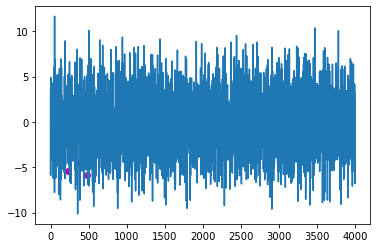

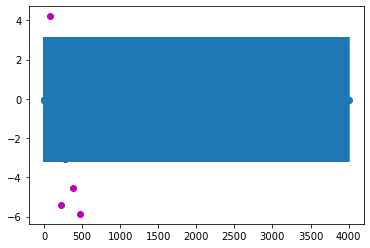

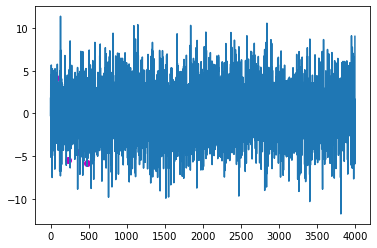

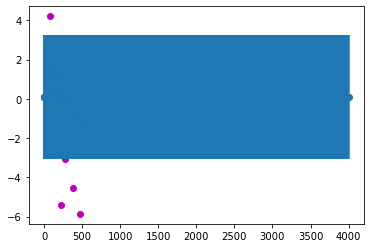

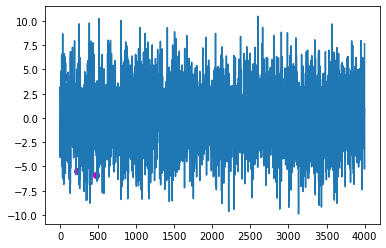

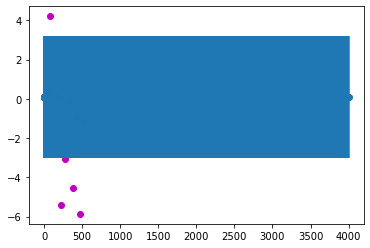

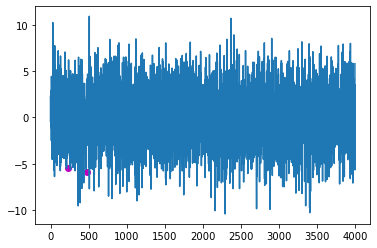

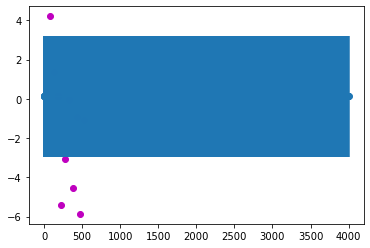

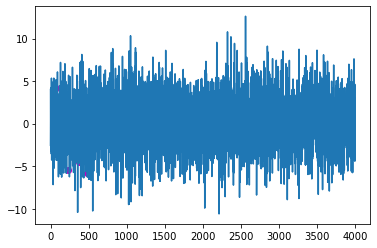

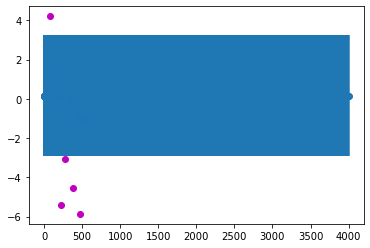

INFO:cmdstanpy:CmdStan start processing


rho: 5, alpha: 5.5, sigma: 2


chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:06 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:09 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:11 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:19 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:21 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:23 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:26 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:29 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:32 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 0


INFO:cmdstanpy:CmdStan done processing.


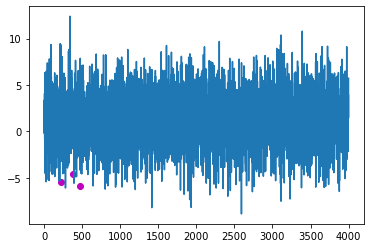

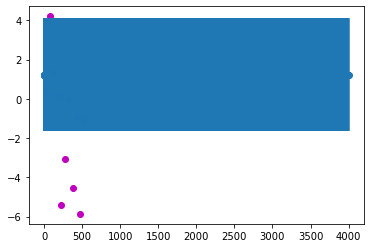

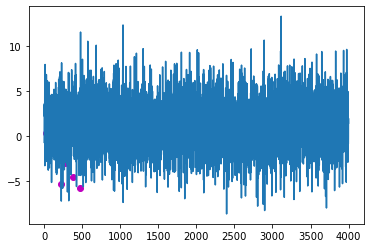

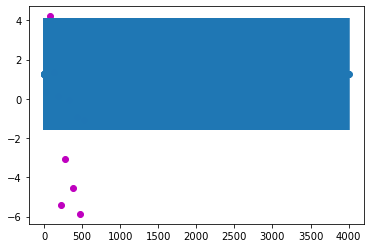

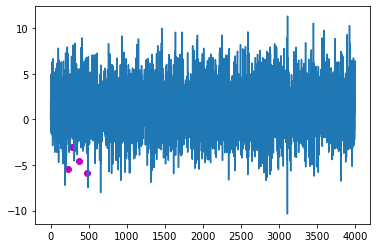

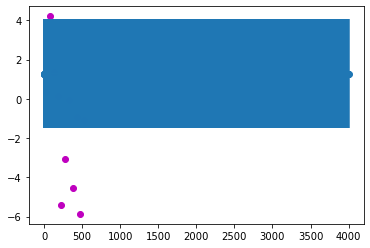

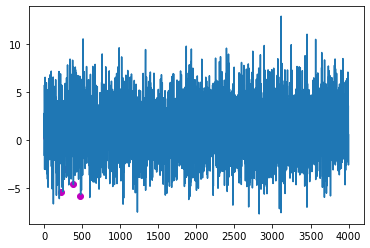

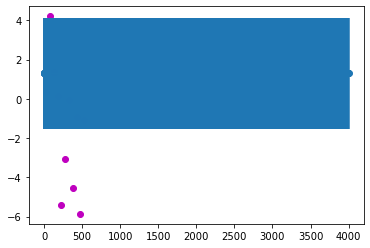

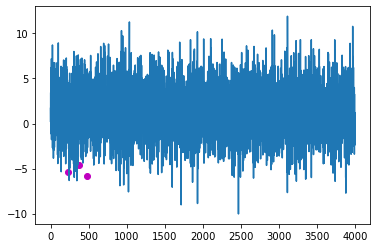

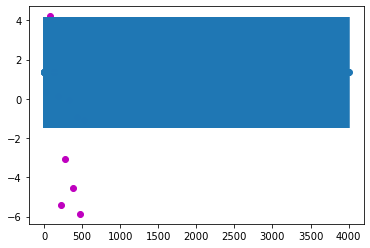

INFO:cmdstanpy:CmdStan start processing


rho: 5, alpha: 10, sigma: 2


chain 1 |          | 00:00 Status


chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:06 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:09 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:18 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:21 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:24 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:26 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:28 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:32 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:37 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:40 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:44 Iteration: 1300 / 2000 [ 65%]  (S


INFO:cmdstanpy:CmdStan done processing.


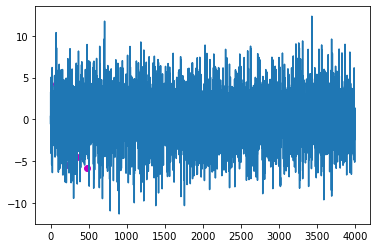

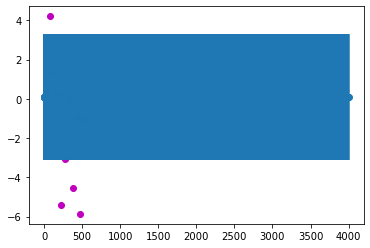

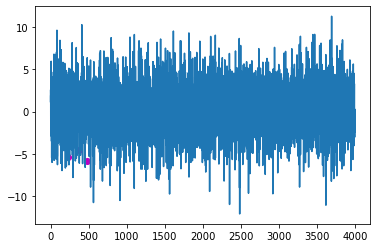

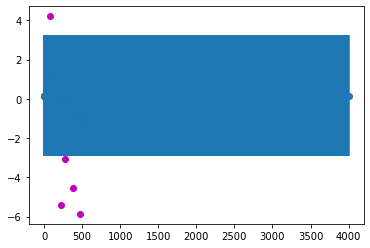

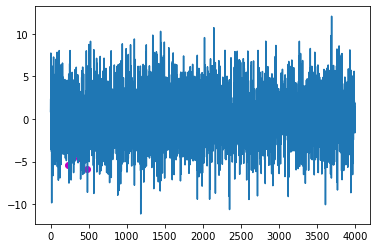

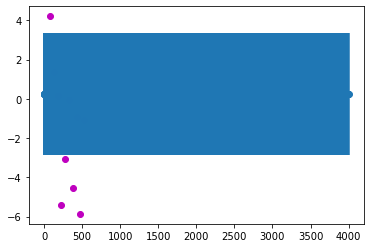

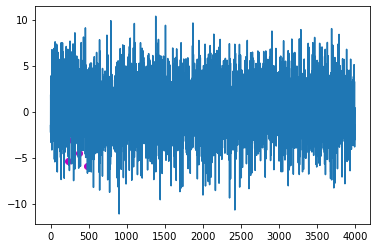

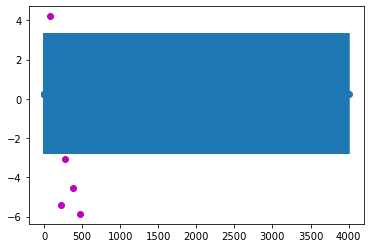

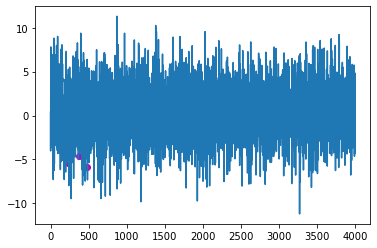

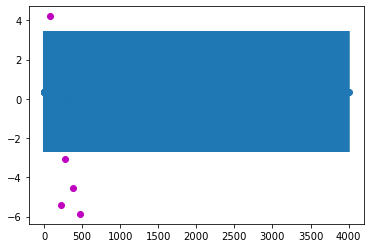

In [8]:
datas = [{
            'N_predict': len(x_predict),
            'x_predict': x_predict,
            'N_obs': len(observed_idx),
            'y_obs': y_obs,
            'observed_idx': observed_idx,
            'rho': 3,
            'alpha': 5.5,
            'sigma': 2
        },
        {
            'N_predict': len(x_predict),
            'x_predict': x_predict,
            'N_obs': len(observed_idx),
            'y_obs': y_obs,
            'observed_idx': observed_idx,
            'rho': 5,
            'alpha': 5.5,
            'sigma': 2
        },
        {
            'N_predict': len(x_predict),
            'x_predict': x_predict,
            'N_obs': len(observed_idx),
            'y_obs': y_obs,
            'observed_idx': observed_idx,
            'rho': 5,
            'alpha': 10,
            'sigma': 2
        }
]
for data in datas:
    print(f"rho: {data['rho']}, alpha: {data['alpha']}, sigma: {data['sigma']}")
    result = model.sample(data=data, chains = 4)
    y_predict = result.stan_variable('y_predict')
    plots = 5
    for plot in range(plots):
        y = y_predict[:, plot]
        plt.plot(y)
        plt.scatter(observed_idx, y_obs, color='m')
        plt.show()
        mean = np.mean(y)
        std = np.std(y)
        plt.errorbar(range(len(y)), [mean]*len(y), std)
        plt.scatter(range(len(y)), [mean]*len(y))
        plt.scatter(observed_idx, y_obs, color='m')
        plt.show()

### Task 2: optimize hyperparameters

To achive better results of GP fitting for our observed data, we need to oprimize its parameters. We can do that by using maximum marginal likelihood estimation. It can be done by placing parameters in "parameter" block in stan model and using "optimize" method.

In [9]:
model2 = CmdStanModel(stan_file='gaussian_process_optimize.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
data = {
            'N_obs': len(observed_idx),
            'y_obs': y_obs,
            'x_obs': x_obs
        }

result2 = model2.optimize(data=data, seed=5838298)
for variable in ['rho', 'alpha', 'sigma']:
    print(f'{variable}: {result2.stan_variable(variable)}')

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


rho: 1.13658
alpha: 3.1811
sigma: 0.196539


Optimize parameters with mentioned method and generate new samples with model from task 1. Of course use just aquired parameters. Do not forget to specify data variable based on stan model. 
What can your say about results in comparison to ones from task 1?
Did the GP perform well in the task of regression? 

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:16 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:23 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:30 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:39 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:46 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:58 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 01:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 01:12 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▍    | 01:19 Iteration: 1000 / 2000 [ 50%]  (Warmup)




chain 1 |█████▉    | 01:27 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 01:37 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 01:46 Iteration: 1200 / 2000 


INFO:cmdstanpy:CmdStan done processing.


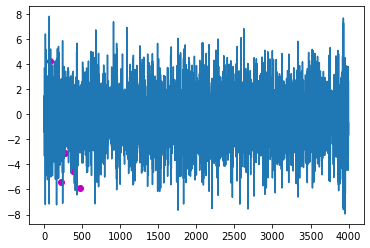

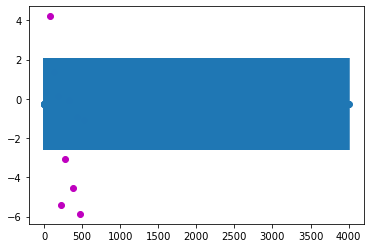

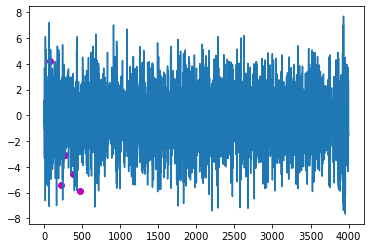

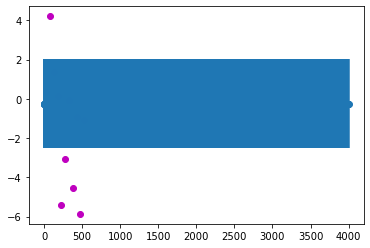

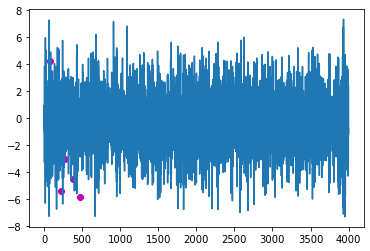

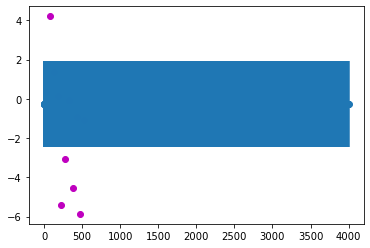

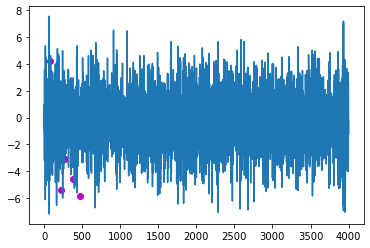

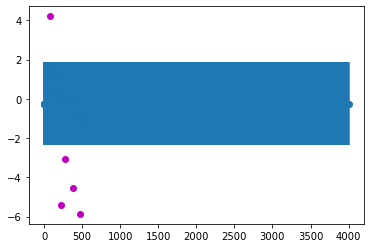

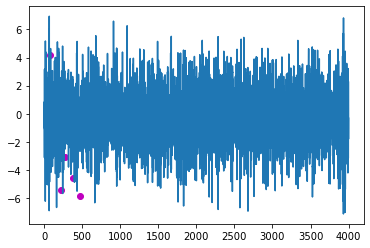

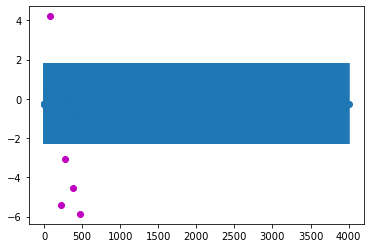

In [11]:
data = {
            'N_predict': len(x_predict),
            'x_predict': x_predict,
            'N_obs': len(observed_idx),
            'y_obs': y_obs,
            'observed_idx': observed_idx,
            'rho': 1.13658,
            'alpha': 3.1811,
            'sigma': 0.196539
        }
result = model.sample(data=data, chains = 4)
y_predict = result.stan_variable('y_predict')
plots = 5
for plot in range(plots):
    y = y_predict[:, plot]
    plt.plot(y)
    plt.scatter(observed_idx, y_obs, color='m')
    plt.show()
    mean = np.mean(y)
    std = np.std(y)
    plt.errorbar(range(len(y)), [mean]*len(y), std)
    plt.scatter(range(len(y)), [mean]*len(y))
    plt.scatter(observed_idx, y_obs, color='m')
    plt.show()